In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import cv2

In [11]:
import tensorflow as tf
import tensorflow.keras as keras

In [12]:
import os

data_path = '/content/drive/My Drive/verzeo/9. Minor Project/dataset'
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories, labels))

label_dict

{'with_mask': 0, 'without_mask': 1}

In [14]:
data = []
target = []

for category in categories:
  folder_path = os.path.join(data_path, category)
  img_names = os.listdir(folder_path)

  for img_name in img_names:
    img_path = os.path.join(folder_path, img_name)
    img = cv2.imread(img_path)

    try:
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      resized = cv2.resize(gray,(100,100))
      data.append(resized)
      target.append(label_dict[category])

    except Exception as e:
       print('Exception:',e) 

In [16]:
import numpy as np

data = np.array(data)/255.0
data = np.reshape(data,(data.shape[0],100,100,1))
target = np.array(target)

from keras.utils import np_utils

new_target = np_utils.to_categorical(target)

In [17]:
np.save('data',data)
np.save('target',new_target)

In [18]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=data.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))),
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         1

In [23]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [24]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data, train_target, epochs=15, callbacks=[checkpoint],validation_split=0.2)

Epoch 1/15
33/33 [==============================] - ETA: 0s - loss: 0.6750 - acc: 0.5491WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: model-001.model/assets


INFO:tensorflow:Assets written to: model-001.model/assets


33/33 [==============================] - 20s 602ms/step - loss: 0.6750 - acc: 0.5491 - val_loss: 0.7013 - val_acc: 0.4961
Epoch 2/15
33/33 [==============================] - 19s 570ms/step - loss: 0.6402 - acc: 0.6152 - val_loss: 0.7747 - val_acc: 0.4961
Epoch 3/15
33/33 [==============================] - ETA: 0s - loss: 0.6097 - acc: 0.6715INFO:tensorflow:Assets written to: model-003.model/assets


INFO:tensorflow:Assets written to: model-003.model/assets


33/33 [==============================] - 19s 581ms/step - loss: 0.6097 - acc: 0.6715 - val_loss: 0.5949 - val_acc: 0.6085
Epoch 4/15
33/33 [==============================] - ETA: 0s - loss: 0.5501 - acc: 0.7240INFO:tensorflow:Assets written to: model-004.model/assets


INFO:tensorflow:Assets written to: model-004.model/assets


33/33 [==============================] - 19s 582ms/step - loss: 0.5501 - acc: 0.7240 - val_loss: 0.5337 - val_acc: 0.7558
Epoch 5/15
33/33 [==============================] - ETA: 0s - loss: 0.5148 - acc: 0.7541INFO:tensorflow:Assets written to: model-005.model/assets


INFO:tensorflow:Assets written to: model-005.model/assets


33/33 [==============================] - 19s 584ms/step - loss: 0.5148 - acc: 0.7541 - val_loss: 0.5112 - val_acc: 0.7093
Epoch 6/15
33/33 [==============================] - ETA: 0s - loss: 0.4766 - acc: 0.7833INFO:tensorflow:Assets written to: model-006.model/assets


INFO:tensorflow:Assets written to: model-006.model/assets


33/33 [==============================] - 19s 587ms/step - loss: 0.4766 - acc: 0.7833 - val_loss: 0.4100 - val_acc: 0.8682
Epoch 7/15
33/33 [==============================] - 18s 554ms/step - loss: 0.4145 - acc: 0.8086 - val_loss: 0.7171 - val_acc: 0.6240
Epoch 8/15
33/33 [==============================] - 18s 556ms/step - loss: 0.3762 - acc: 0.8367 - val_loss: 0.4985 - val_acc: 0.7364
Epoch 9/15
33/33 [==============================] - ETA: 0s - loss: 0.3321 - acc: 0.8610INFO:tensorflow:Assets written to: model-009.model/assets


INFO:tensorflow:Assets written to: model-009.model/assets


33/33 [==============================] - 19s 588ms/step - loss: 0.3321 - acc: 0.8610 - val_loss: 0.2999 - val_acc: 0.8682
Epoch 10/15
33/33 [==============================] - ETA: 0s - loss: 0.2918 - acc: 0.8844INFO:tensorflow:Assets written to: model-010.model/assets


INFO:tensorflow:Assets written to: model-010.model/assets


33/33 [==============================] - 19s 588ms/step - loss: 0.2918 - acc: 0.8844 - val_loss: 0.2665 - val_acc: 0.9264
Epoch 11/15
33/33 [==============================] - ETA: 0s - loss: 0.2466 - acc: 0.9125INFO:tensorflow:Assets written to: model-011.model/assets


INFO:tensorflow:Assets written to: model-011.model/assets


33/33 [==============================] - 19s 587ms/step - loss: 0.2466 - acc: 0.9125 - val_loss: 0.2472 - val_acc: 0.9302
Epoch 12/15
33/33 [==============================] - 18s 555ms/step - loss: 0.2127 - acc: 0.9223 - val_loss: 0.3135 - val_acc: 0.8488
Epoch 13/15
33/33 [==============================] - 18s 555ms/step - loss: 0.1843 - acc: 0.9427 - val_loss: 0.3131 - val_acc: 0.8488
Epoch 14/15
33/33 [==============================] - ETA: 0s - loss: 0.1695 - acc: 0.9388INFO:tensorflow:Assets written to: model-014.model/assets


INFO:tensorflow:Assets written to: model-014.model/assets


33/33 [==============================] - 19s 590ms/step - loss: 0.1695 - acc: 0.9388 - val_loss: 0.2114 - val_acc: 0.9302
Epoch 15/15
33/33 [==============================] - 18s 557ms/step - loss: 0.1452 - acc: 0.9495 - val_loss: 0.2471 - val_acc: 0.8876


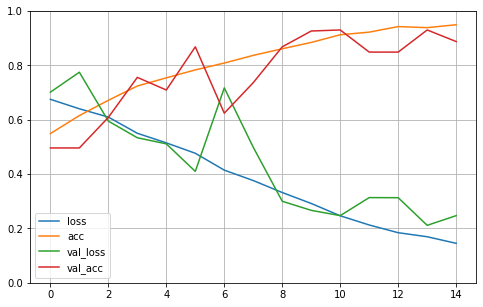

<Figure size 576x432 with 0 Axes>

In [26]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

figure = plt.gcf()
figure.set_size_inches(8,6)
#plt.savefig('filename.png, bbox_inches = 'tight')
plt.savefig('loss_accuracy_graph.png',dpi=300, bbox_inches='tight')

In [27]:
model.save('model_v3.h5')

In [28]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 105ms/step - loss: 0.2456 - acc: 0.8889
[0.24561497569084167, 0.8888888955116272]


In [45]:
new = test_data[:5]

In [46]:
y_pred = model.predict_classes(new)

print(y_pred)
print(label_dict)

[[1]
 [0]
 [1]
 [0]
 [0]]
{'with_mask': 0, 'without_mask': 1}


AxesImage(54,36;334.8x217.44)


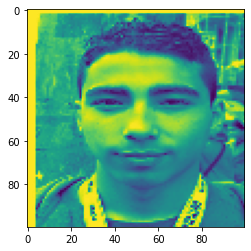

In [66]:
print(plt.imshow(test_data[0].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


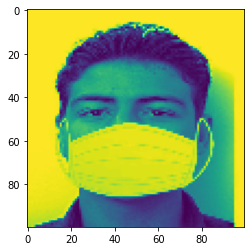

In [32]:
print(plt.imshow(test_data[1].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


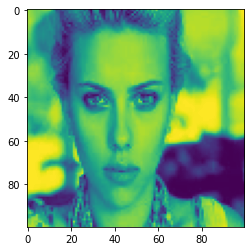

In [33]:
print(plt.imshow(test_data[2].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


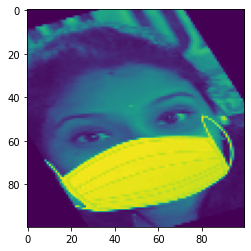

In [34]:
print(plt.imshow(test_data[3].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


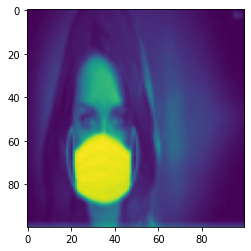

In [35]:
print(plt.imshow(test_data[4].reshape(100,100)))

**DRAWING A BOX AROUND THE MOUTH**

Faces found:  1


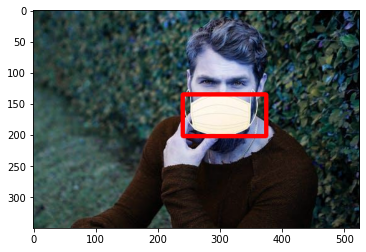

In [65]:
test_image = cv2.imread('/content/drive/My Drive/verzeo/9. Minor Project/dataset/with_mask/0-with-mask.jpg')

#Converting to grayscale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image
plt.imshow(test_image_gray, cmap='gray')

def convertToRGB(test_image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

haar_cascade_face =cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, (int)(y+h/2)), (x+w, y+h), (255, 0, 0), 5)

#convert image to RGB and show image
plt.imshow(test_image)